## Tune some hyperparameters for the RandomForest model, specifically with regard to feature engineering (as it will be much quicker to do so here than for the final boosted model)

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None
%matplotlib inline

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
# Add library to path 
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.model import load_and_process_training_data, full_pipeline
from lib.model import param_grid, f1_scorer, kfold


# from lib.pipeline import kfold, f1_scorer, FeatureExtractor, FeatureEngineer, LazyProcessing
# from lib.visualization import plot_confusion_matrix, plot_learning_curve
# from lib.preprocessing import preprocess
# import lib.preprocessing as prep

c:\users\zrankin\appdata\local\continuum\miniconda3\envs\kaggle\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
X_train, y_train = load_and_process_training_data()

In [6]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [7]:
%%time

grid = GridSearchCV(full_pipeline, param_grid=param_grid, cv=kfold, scoring=f1_scorer, n_jobs=1)
grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])
print(grid.best_params_)

[0.34982927 0.35392604 0.35392604 0.35162108 0.35666924 0.35666924
 0.34470144 0.34103834 0.34103834 0.34270281 0.34961361 0.34952352
 0.34508444 0.34306911 0.34413822 0.37075685 0.36802685 0.36802685
 0.340078   0.34909245 0.34909245 0.34026924 0.34911804 0.34911804
 0.34565687 0.33450553 0.33450553 0.34507026 0.35541103 0.35541103
 0.36073066 0.36319663 0.36319663 0.35620335 0.36663517 0.36663517
 0.34666913 0.34950306 0.3493883  0.35192484 0.35467037 0.35467037
 0.34514176 0.33877141 0.33877141 0.35561408 0.33979591 0.33979591
 0.34015361 0.33901633 0.33901633 0.34228058 0.33883845 0.33883845
 0.34572546 0.33652091 0.33631689 0.35793608 0.34997573 0.34997573
 0.33546571 0.3332384  0.3332384  0.35091121 0.34202103 0.34202103
 0.33225529 0.33612811 0.33612811 0.3253158  0.32924226 0.32924226
 0.33968871 0.3422702  0.3422702  0.34573665 0.3462956  0.3462956
 0.34273681 0.32889554 0.32889554 0.32212361 0.33050225 0.33050225
 0.35141542 0.34804358 0.34804358 0.33818641 0.34837039 0.34837

In [8]:
report(grid.cv_results_)

Model with rank: 1
Mean validation score: 0.371 (std: 0.022)
Parameters: {'features__extract_assets__level': 'low', 'features__extract_demog__level': 'low', 'features__extract_educ__level': 'low', 'features__extract_housec__level': 'medium', 'features__extract_houseq__level': 'low', 'features__extract_rent__level': 'medium', 'random_forest__max_depth': 20}

Model with rank: 2
Mean validation score: 0.368 (std: 0.016)
Parameters: {'features__extract_assets__level': 'low', 'features__extract_demog__level': 'low', 'features__extract_educ__level': 'low', 'features__extract_housec__level': 'medium', 'features__extract_houseq__level': 'low', 'features__extract_rent__level': 'medium', 'random_forest__max_depth': 30}

Model with rank: 2
Mean validation score: 0.368 (std: 0.016)
Parameters: {'features__extract_assets__level': 'low', 'features__extract_demog__level': 'low', 'features__extract_educ__level': 'low', 'features__extract_housec__level': 'medium', 'features__extract_houseq__level': 'lo

In [9]:
model = grid.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('extract_rent', FeatureEngineer(func=<function feature_engineer_rent at 0x00000211BE97C840>,
        level='medium')), ('extract_educ', FeatureEngineer(func=<function feature_engineer_education at 0x00000211BE97C8C8>,
        level...estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False))])

Wall time: 1min 22s


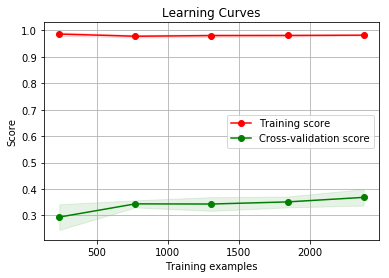

In [12]:
%%time
from lib.visualization import plot_learning_curve
plot_learning_curve(model, 'Learning Curves', X_train, y_train, cv=kfold, scoring=f1_scorer)

In [10]:
BREAK

NameError: name 'BREAK' is not defined

# Why can't I seem to get the right dimensions for feature engineering? 

In [ ]:
from lib.preprocessing import run_feature_engineering
df = run_feature_engineering(X_train)
df.head()

In [ ]:
df.columns.shape

In [ ]:
df.columns.unique().shape

In [ ]:
estimator.feature_importances_.shape

In [ ]:
estimator = model.steps[-1][1]

# WARNING - need to fix for automated feature selection, as column names/orders are not preserved
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': estimator.feature_importances_})
feature_importances.sort_values('importance', ascending=False)

# estimator.feature_importances_